In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\global_tech_salary.txt', sep=',')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


In [3]:
df.shape, df.isna().sum()

((5000, 11),
 work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                0
 salary_currency       0
 salary_in_usd         0
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64)

In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,2023.136400,1.588089e+05,148924.465200,32.800000
std,0.696198,2.072854e+05,66986.391667,46.492928
min,2020.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,1.019408e+05,100573.250000,0.000000
50%,2023.000000,1.420000e+05,140304.000000,0.000000
75%,2024.000000,1.870000e+05,185900.000000,100.000000
max,2024.000000,8.500000e+06,750000.000000,100.000000


<Axes: title={'center': 'When was this data collected?'}, ylabel='count'>

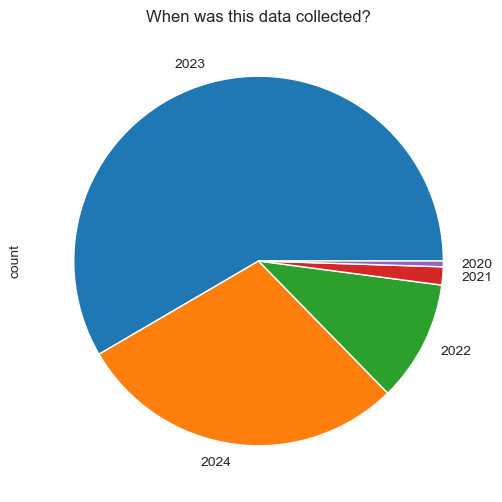

In [5]:
plt.figure(figsize = (12,6))
plt.title("When was this data collected?")
df['work_year'].value_counts().plot(kind='pie')

In [6]:
len(df['job_title'].unique()) 

123

In [7]:
salary_title = df.groupby('job_title')['salary_in_usd'].mean()
salary_title = salary_title.reset_index()
salary_title.sort_values(by='salary_in_usd', inplace=True, ascending=False)
salary_title.head()

,job_title,salary_in_usd
91,Lead Data Engineer,276000.000000
7,AWS Data Architect,258000.000000
88,Head of Machine Learning,255461.800000
80,Director of Data Science,253108.818182
0,AI Architect,231608.600000


Text(0, 0.5, 'Salary')

<Figure size 1200x600 with 0 Axes>

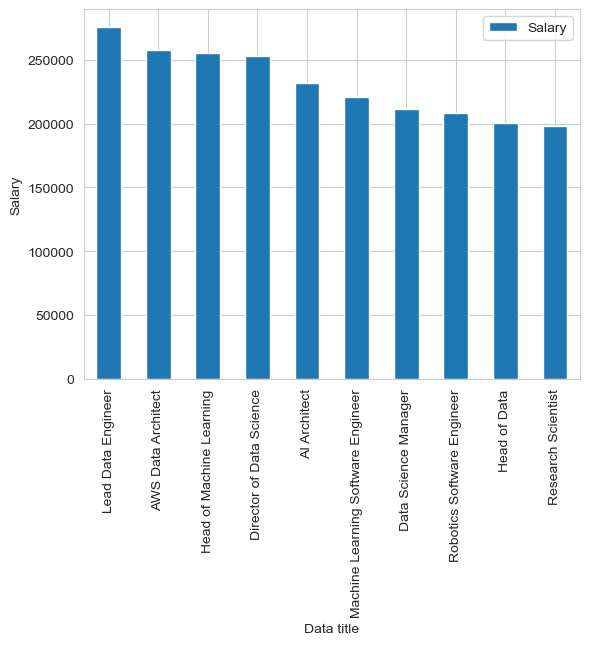

In [8]:
plt.figure(figsize = (12,6))
salary_title.head(10).plot(kind='bar', x ='job_title', y='salary_in_usd', label = 'Salary')    # Top 10 best paid data jobsplt.xlabel('Data title')
plt.xlabel('Data title')
plt.ylabel('Salary')

In [9]:
experience_group = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
experience_group.sort_values(by='salary_in_usd', inplace=True, ascending=False)
experience_group

,experience_level,salary_in_usd
1,EX,188359.438272
3,SE,162814.877771
2,MI,124433.395885
0,EN,90930.128000


Text(0.5, 0, 'Job Titles')

<Figure size 1200x500 with 0 Axes>

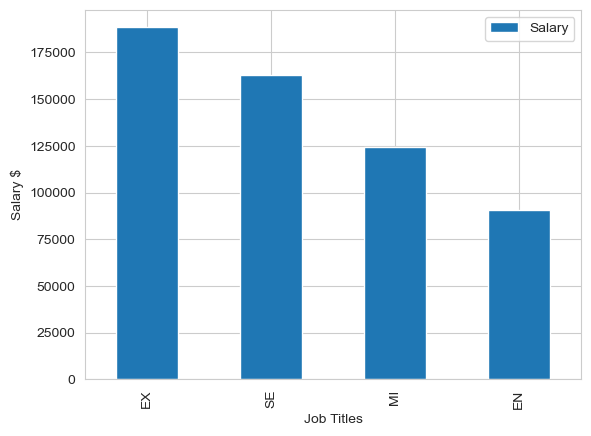

In [10]:
plt.figure(figsize=(12,5))
experience_group.plot(kind='bar', x ='experience_level',y='salary_in_usd', label='Salary')
plt.ylabel('Salary $')
plt.xlabel('Job Titles')

In [11]:
df['job_title'].value_counts().head().reset_index()

,job_title,count
0,Data Engineer,1067
1,Data Scientist,1025
2,Data Analyst,735
3,Machine Learning Engineer,511
4,Research Scientist,153


In [12]:
most_common_title = ['Data Engineer', 'Data Scientist', 'Data Analyst']
filtered = df[df['job_title'].isin(most_common_title)]
salary_most_common = filtered.groupby('job_title')['salary_in_usd'].mean().reset_index()
salary_most_common

,job_title,salary_in_usd
0,Data Analyst,106490.183673
1,Data Engineer,146515.822868
2,Data Scientist,153309.175610


<Axes: xlabel='job_title'>

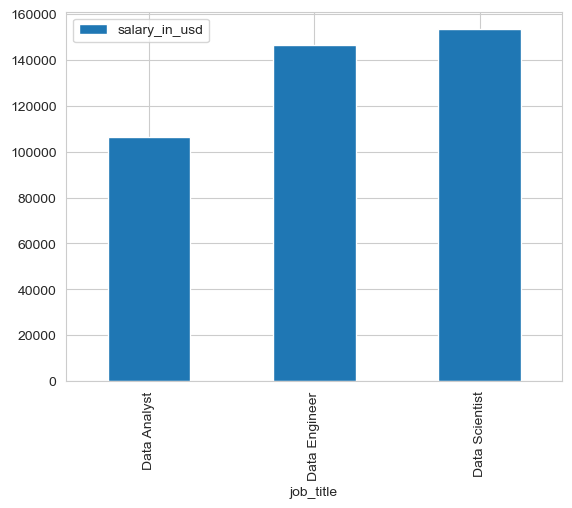

In [13]:
salary_most_common.plot(kind='bar', x = 'job_title', y='salary_in_usd')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

features = ['experience_level', 'job_title', 'employee_residence', 'company_location', 'company_size']
target = 'salary_in_usd'

In [15]:
X = df[features]
y = df[target]

In [16]:
categorical_features = features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [17]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['experience_level',
                                                   'job_title',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('regressor', LinearRegression())])

In [19]:
yhat = pipeline.predict(X_test)

In [20]:
r2 = r2_score(y_test, yhat)
rmse = mean_squared_error(y_test, yhat, squared=False)
r2, rmse

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.31546287941776296, 58366.24951026235)

In [25]:
jimmy = pd.DataFrame({
    'experience_level': ['EN'],
    'job_title': ['Data Analyst'],
    'employee_residence': ['US'],
    'company_location': ['US'],
    'company_size': ['L']
})
predicted_salary = pipeline.predict(jimmy)
print(f"Jimmy's expected salary is ${predicted_salary[0]:.2f}.")

johnny = pd.DataFrame({
    'experience_level': ['2'],
    'job_title': ['Data Analyst'],
    'employee_residence': ['US'],
    'company_location': ['US'],
    'company_size': ['L']
})
predicted_salary = pipeline.predict(johnny)
print(f"Johnny's expected salary is ${predicted_salary[0]:.2f}.")

Jimmy's expected salary is $80269.13.
Johnny's expected salary is $112087.18.
